In [ ]:
import cv2
cv2.__version__

'4.10.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/dltpdn/insightbook.opencv_project_python

Cloning into 'insightbook.opencv_project_python'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 469 (delta 23), reused 38 (delta 16), pack-reused 389 (from 1)
Receiving objects: 100% (469/469), 30.72 MiB | 11.70 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (370/370), done.


#7장 영상 분할

In [ ]:
%cd /content/insightbook.opencv_project_python/07.segmentation

/content/insightbook.opencv_project_python/07.segmentation


##7.1 컨투어

In [ ]:
!python cntr_find.py

도형의 갯수: 3(3)


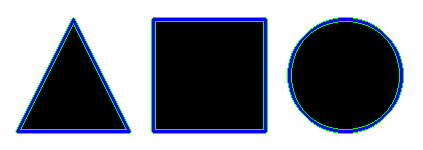

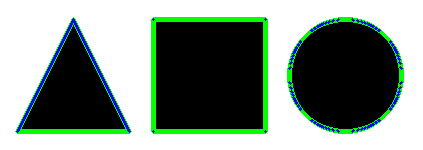

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/shapes.png')
img2 = img.copy()

# 그레이 스케일로 변환 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 스레시홀드로 바이너리 이미지로 만들어서 검은배경에 흰색전경으로 반전 ---②
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥쪽 컨투어에 대해 모든 좌표 반환 ---③
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                 cv2.CHAIN_APPROX_NONE)[-2:]
# 가장 바깥쪽 컨투어에 대해 꼭지점 좌표만 반환 ---④
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 각각의 컨투의 갯수 출력 ---⑤
print('도형의 갯수: %d(%d)'% (len(contour), len(contour2)))

# 모든 좌표를 갖는 컨투어 그리기, 초록색  ---⑥
cv2.drawContours(img, contour, -1, (0,255,0), 4)
# 꼭지점 좌표만을 갖는 컨투어 그리기, 초록색  ---⑦
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)

# 컨투어 모든 좌표를 작은 파랑색 점(원)으로 표시 ---⑧
for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]), 1, (255,0,0), -1)

# 컨투어 꼭지점 좌표를 작은 파랑색 점(원)으로 표시 ---⑨
for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]), 1, (255,0,0), -1)

# 결과 출력 ---⑩
#cv2.imshow('CHAIN_APPROX_NONE', img)
#cv2.imshow('CHAIN_APPROX_SIMPLE', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python cntr_hierarchy.py

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


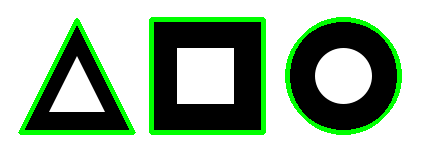

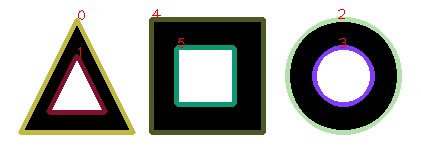

In [ ]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('../img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 가장 바깥 컨투어만 수집   --- ①
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, \
                                                cv2.CHAIN_APPROX_NONE)[-2:]
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]
# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3)
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2):
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))

# 화면 출력
#cv2.imshow('RETR_EXTERNAL', img)
#cv2.imshow('RETR_TREE', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.1.1 이미지 모멘트와 컨투어 속성

In [ ]:
!python cntr_moment.py

area:9870.00
area:12544.00
area:6216.00


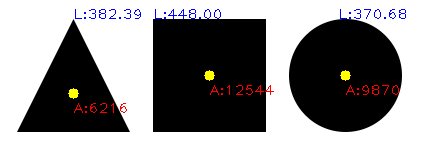

In [ ]:
import cv2
import numpy as np

img = cv2.imread("../img/shapes.png")
# 그레이 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]

# 각 도형의 컨투어에 대한 루프
for c in contours:
    # 모멘트 계산
    mmt = cv2.moments(c)
    # m10/m00, m01/m00  중심점 계산
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    # 영역 넓이
    a = mmt['m00']
    # 영역 외곽선 길이
    l = cv2.arcLength(c, True)
    # 중심점에 노란색 점 그리기
    cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1)
    # 중심점 근처에 넓이 그리기
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20) , cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (0,0,255))
    # 컨투어 시작점에 길이 그리기
    cv2.putText(img, "L:%.2f"%l, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, \
                                                            1, (255,0,0))
    # 함수로 컨투어 넓이 계산해서 출력
    print("area:%.2f"%cv2.contourArea(c, False))

# 결과 출력
#cv2.imshow('center', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!python cntr_bound_fit.py

<class 'numpy.ndarray'> (332, 1, 2) int32


<ipython-input-16-f3c50d17b8dc>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)          # 정수로 변환
<ipython-input-16-f3c50d17b8dc>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.line(img, (0, int(0-x*(vy/vx) + y)), (cols-1, int((cols-x)*(vy/vx) + y)), \


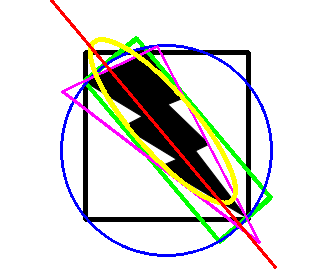

In [ ]:
import cv2
import numpy as np

# 이미지 읽어서 그레이스케일 변환, 바이너리 스케일 변환
img = cv2.imread("../img/lightning.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127,255,cv2.THRESH_BINARY_INV)

# 컨튜어 찾기
contours, hr = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                        cv2.CHAIN_APPROX_SIMPLE)[-2:]
contr = contours[0]
print(type(contr), contr.shape, contr.dtype)

# 감싸는 사각형 표시(검정색)
x,y,w,h = cv2.boundingRect(contr)
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형 표시(초록색)
rect = cv2.minAreaRect(contr)
box = cv2.boxPoints(rect)   # 중심점과 각도를 4개의 꼭지점 좌표로 변환
box = np.int0(box)          # 정수로 변환
cv2.drawContours(img, [box], -1, (0,255,0), 3)

# 최소한의 원 표시(파랑색)
(x,y), radius = cv2.minEnclosingCircle(contr)
cv2.circle(img, (int(x), int(y)), int(radius), (255,0,0), 2)

# 최소한의 삼각형 표시(분홍색)
ret, tri = cv2.minEnclosingTriangle(np.float32(contr))
cv2.polylines(img, [np.int32(tri)], True, (255,0,255), 2)

# 최소한의 타원 표시(노랑색)
ellipse = cv2.fitEllipse(contr)
cv2.ellipse(img, ellipse, (0,255,255), 3)

# 중심점 통과하는 직선 표시(빨강색)
vx,vy,x,y = cv2.fitLine(contr, cv2.DIST_L2,0,0.01,0.01)
cols,rows = img.shape[:2]
cv2.line(img, (0, int(0-x*(vy/vx) + y)), (cols-1, int((cols-x)*(vy/vx) + y)), \
                                                        (0,0,255),2)

# 결과 출력
#cv2.imshow('Bound Fit shapes', img)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.1.2 컨투어 단순화

In [ ]:
!python cntr_approximate.py

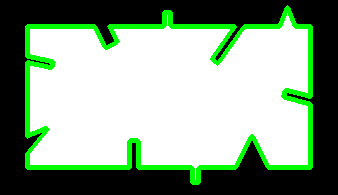

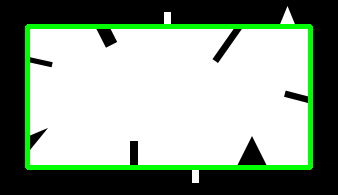

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/bad_rect.png')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 ---①
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)[-2:]
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 ---②
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 ---③
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

# 결과 출력
#cv2.imshow('contour', img)
#cv2.imshow('approx', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
!python cntr_convexhull.py

False True


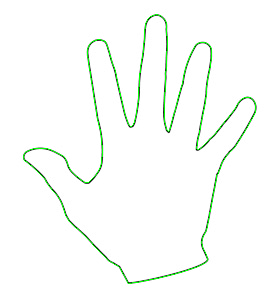

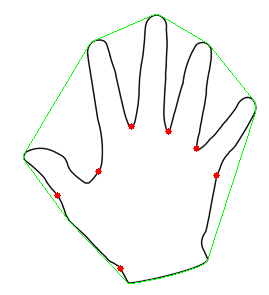

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/hand.jpg')
img2 = img.copy()
# 그레이 스케일 및 바이너리 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기와 그리기 ---②
contours, heiarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                         cv2.CHAIN_APPROX_SIMPLE)[-2:]
cntr = contours[0]
cv2.drawContours(img, [cntr], -1, (0, 255,0), 1)

# 볼록 선체 찾기(좌표 기준)와 그리기 ---③
hull = cv2.convexHull(cntr)
cv2.drawContours(img2, [hull], -1, (0,255,0), 1)
# 볼록 선체 만족 여부 확인 ---④
print(cv2.isContourConvex(cntr), cv2.isContourConvex(hull))

# 볼록 선체 찾기(인덱스 기준) ---⑤
hull2 = cv2.convexHull(cntr, returnPoints=False)
# 볼록 선체 결함 찾기 ---⑥
defects = cv2.convexityDefects(cntr, hull2)
# 볼록 선체 결함 순회
for i in range(defects.shape[0]):
    # 시작, 종료, 가장 먼 지점, 거리 ---⑦
    startP, endP, farthestP, distance = defects[i, 0]
    # 가장 먼 지점의 좌표 구하기 ---⑧
    farthest = tuple(cntr[farthestP][0])
    # 거리를 부동 소수점으로 변환 ---⑨
    dist = distance/256.0
    # 거리가 1보다 큰 경우 ---⑩
    if dist > 1 :
        # 빨강색 점 표시
        cv2.circle(img2, farthest, 3, (0,0,255), -1)
# 결과 이미지 표시
#cv2.imshow('contour', img)
#cv2.imshow('convex hull', img2)

cv2_imshow(img)
cv2_imshow(img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.1.3 컨투어와 도형 매칭

In [ ]:
!python cntr_matchShape.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



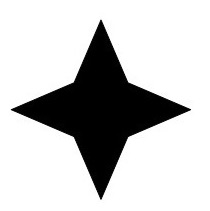

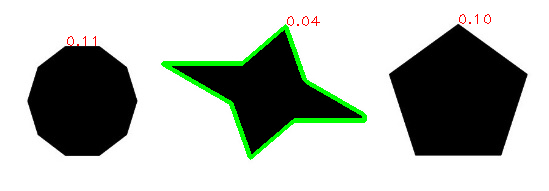

In [ ]:
import cv2
import numpy as np

# 매칭을 위한 이미지 읽기
target = cv2.imread('../img/4star.jpg') # 매칭 대상
shapes = cv2.imread('../img/shapestomatch.jpg') # 여러 도형
# 그레이 스케일 변환
targetGray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
shapesGray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, targetTh = cv2.threshold(targetGray, 127, 255, cv2.THRESH_BINARY_INV)
ret, shapesTh = cv2.threshold(shapesGray, 127, 255, cv2.THRESH_BINARY_INV)
# 컨투어 찾기
cntrs_target, _ = cv2.findContours(targetTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]
cntrs_shapes, _ = cv2.findContours(shapesTh, cv2.RETR_EXTERNAL, \
                                            cv2.CHAIN_APPROX_SIMPLE)[-2:]

# 각 도형과 매칭을 위한 반복문
matchs = [] # 컨투어와 매칭 점수를 보관할 리스트
for contr in cntrs_shapes:
    # 대상 도형과 여러 도형 중 하나와 매칭 실행 ---①
    match = cv2.matchShapes(cntrs_target[0], contr, cv2.CONTOURS_MATCH_I2, 0.0)
    # 해당 도형의 매칭 점수와 컨투어를 쌍으로 저장 ---②
    matchs.append( (match, contr) )
    # 해당 도형의 컨투어 시작지점에 매칭 점수 표시 ---③
    cv2.putText(shapes, '%.2f'%match, tuple(contr[0][0]),\
                    cv2.FONT_HERSHEY_PLAIN, 1,(0,0,255),1 )
# 매칭 점수로 정렬 ---④
matchs.sort(key=lambda x : x[0])
# 가장 적은 매칭 점수를 얻는 도형의 컨투어에 선 그리기 ---⑤
cv2.drawContours(shapes, [matchs[0][1]], -1, (0,255,0), 3)
#cv2.imshow('target', target)
#cv2.imshow('Match Shape', shapes)

cv2_imshow(target)
cv2_imshow(shapes)

cv2.waitKey()
cv2.destroyAllWindows()

##7.2 허프 변환

### 7.2.1 허프 선 변환

In [ ]:
!python hough_line.py

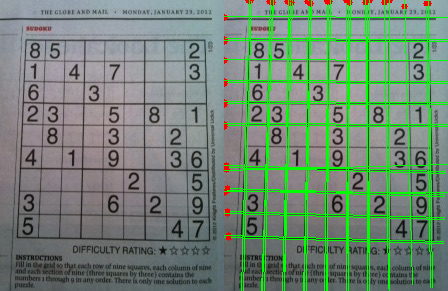

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
img2 = img.copy()
h, w = img.shape[:2]
# 그레이 스케일 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 100, 200 )
# 허프 선 검출 ---②
lines = cv2.HoughLines(edges, 1, np.pi/180, 130)
for line in lines: # 검출된 모든 선 순회
    r,theta = line[0] # 거리와 각도wh
    tx, ty = np.cos(theta), np.sin(theta) # x, y축에 대한 삼각비
    x0, y0 = tx*r, ty*r  #x, y 기준(절편) 좌표
    # 기준 좌표에 빨강색 점 그리기
    cv2.circle(img2, (int(abs(x0)), int(abs(y0))), 3, (0,0,255), -1)
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    # 선그리기
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)

#결과 출력
merged = np.hstack((img, img2))
#cv2.imshow('hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

### 7.2.2 확률적 허프 선 변환

In [ ]:
!python hough_lineP.py

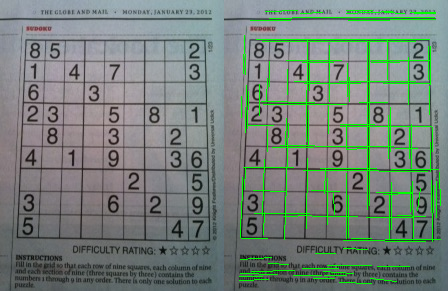

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/sudoku.jpg')
img2 = img.copy()
# 그레이 스케일로 변환 및 엣지 검출 ---①
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

# 확율 허프 변환 적용 ---②
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    # 검출된 선 그리기 ---③
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
#cv2.imshow('Probability hough line', merged)
cv2_imshow(merged)
cv2.waitKey()
cv2.destroyAllWindows()

### 7.2.3 허프 원 변환

In [ ]:
!python hough_circle.py

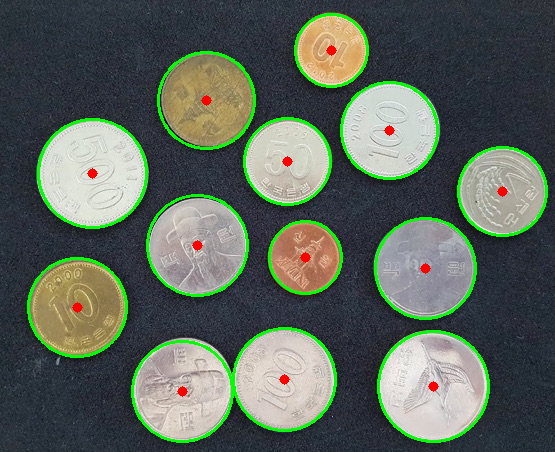

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/coins_spread1.jpg')
# 그레이 스케일 변환 ---①
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 노이즈 제거를 위한 가우시안 블러 ---②
blur = cv2.GaussianBlur(gray, (3,3), 0)
# 허프 원 변환 적용( dp=1.5, minDist=30, cany_max=200 ) ---③
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 원 둘레에 초록색 원 그리기
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2)
        # 원 중심점에 빨강색 원 그리기
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5)

# 결과 출력
#cv2.imshow('hough circle', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


##7.3 연속 영역 분할

### 7.3.1 거리 변환

In [ ]:
!python distanceTrans.py

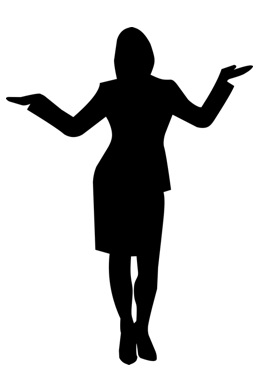

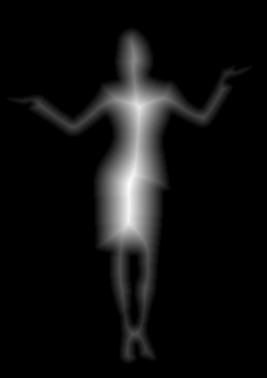

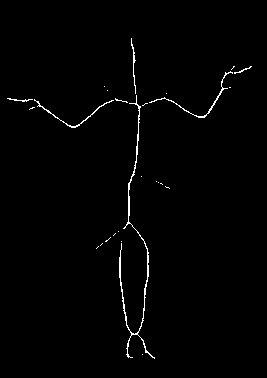

In [ ]:
import cv2
import numpy as np

# 이미지를 읽어서 바이너리 스케일로 변환
img = cv2.imread('../img/full_body.jpg', cv2.IMREAD_GRAYSCALE)
_, biimg = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 거리 변환 ---①
dst = cv2.distanceTransform(biimg, cv2.DIST_L2, 5)
# 거리 값을 0 ~ 255 범위로 정규화 ---②
dst = (dst/(dst.max()-dst.min()) * 255).astype(np.uint8)
# 거리 값에 쓰레시홀드로 완전한 뼈대 찾기 ---③
skeleton = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                                 cv2.THRESH_BINARY, 7, -3)
# 결과 출력
#cv2.imshow('origin', img)
#cv2.imshow('dist', dst)
#cv2.imshow('skel', skeleton)

cv2_imshow(img)
cv2_imshow(dst)
cv2_imshow(skeleton)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.3.2 연결 요소 레이블링

In [ ]:
!python connected_label.py

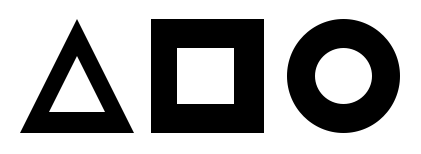

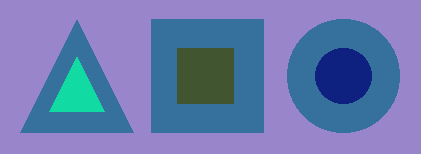

In [ ]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('../img/shapes_donut.png')
# 결과 이미지 생성
img2 = np.zeros_like(img)
# 그레이 스케일과 바이너리 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 연결된 요소 레이블링 적용 ---①
cnt, labels = cv2.connectedComponents(th)
#retval, labels, stats, cent = cv2.connectedComponentsWithStats(th)

# 레이블 갯수 만큼 순회
for i in range(cnt):
    # 레이블이 같은 영역에 랜덤한 색상 적용 ---②
    img2[labels==i] =  [int(j) for j in np.random.randint(0,255, 3)]

# 결과 출력
#cv2.imshow('origin', img)
#cv2.imshow('labeled', img2)
cv2_imshow(img)
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.3.3 색 채우기

In [ ]:
!python flood_fill.py

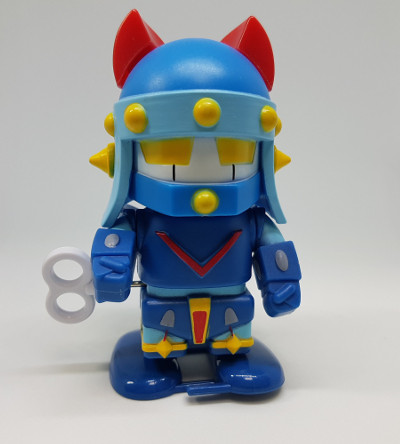

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
rows, cols = img.shape[:2]
# 마스크 생성, 원래 이미지 보다 2픽셀 크게 ---①
mask = np.zeros((rows+2, cols+2), np.uint8)
# 채우기에 사용할 색 ---②
newVal = (255,255,255)
# 최소 최대 차이 값 ---③
loDiff, upDiff = (10,10,10), (10,10,10)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mask, img
    if event == cv2.EVENT_LBUTTONDOWN:
        seed = (x,y)
        # 색 채우기 적용 ---④
        retval = cv2.floodFill(img, mask, seed, newVal, loDiff, upDiff)
        # 채우기 변경 결과 표시 ---⑤
        cv2.imshow('img', img)

# 화면 출력
#cv2.imshow('img', img)
cv2_imshow(img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.3.4 워터셰드

In [ ]:
!python watershed.py

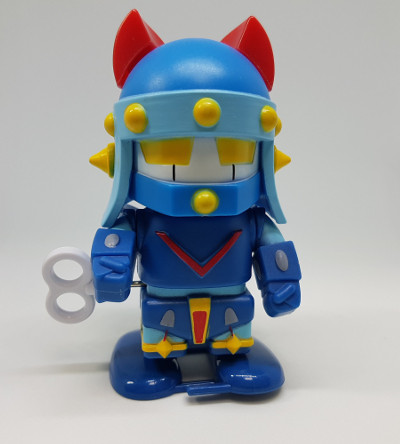

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
rows, cols = img.shape[:2]
img_draw = img.copy()

# 마커 생성, 모든 요소는 0으로 초기화 ---①
marker = np.zeros((rows, cols), np.int32)
markerId = 1        # 마커 아이디는 1에서 시작
colors = []         # 마커 선택한 영역 색상 저장할 공간
isDragging = False  # 드래그 여부 확인 변수

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global img_draw, marker, markerId, isDragging
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작
        isDragging = True
        # 각 마커의 아이디와 현 위치의 색상 값을 쌍으로 매핑해서 저장
        colors.append((markerId, img[y,x]))
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임
        if isDragging:                  # 드래그 진행 중
            # 마우스 좌표에 해당하는 마커의 좌표에 동일한 마커 아이디로 채워 넣기 ---②
            marker[y,x] = markerId
            # 마커 표시한 곳을 빨강색점으로 표시해서 출력
            cv2.circle(img_draw, (x,y), 3, (0,0,255), -1)
            cv2.imshow('watershed', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업
        if isDragging:
            isDragging = False          # 드래그 중지
            # 다음 마커 선택을 위해 마커 아이디 증가 ---③
            markerId +=1
    elif event == cv2.EVENT_RBUTTONDOWN: # 오른쪽 마우스 버튼 누름
            # 모아 놓은 마커를 이용해서 워터 쉐드 적용 ---④
            cv2.watershed(img, marker)
            # 마커에 -1로 표시된 경계를 초록색으로 표시  ---⑤
            img_draw[marker == -1] = (0,255,0)
            for mid, color in colors: # 선택한 마커 아이디 갯수 만큼 반복
                # 같은 마커 아이디 값을 갖는 영역을 마커 선택한 색상으로 채우기 ---⑥
                img_draw[marker==mid] = color
            cv2.imshow('watershed', img_draw) # 표시한 결과 출력

# 화면 출력
#cv2.imshow('watershed', img)
cv2_imshow(img)

cv2.setMouseCallback('watershed', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 7.3.5 그랩컷

In [ ]:
!python grabcut.py

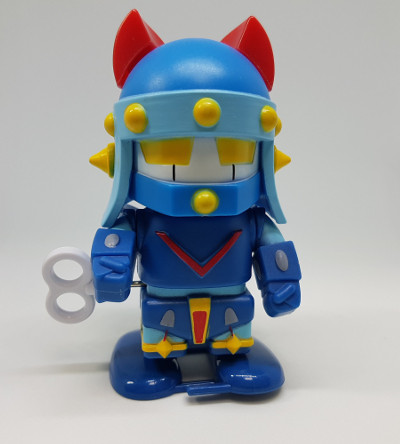

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window_QT.cpp:753: error: (-27:Null pointer) NULL window handler in function 'cvSetMouseCallback'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
img_draw = img.copy()
mask = np.zeros(img.shape[:2], dtype=np.uint8)  # 마스크 생성
rect = [0,0,0,0]    # 사각형 영역 좌표 초기화
mode = cv2.GC_EVAL  # 그랩컷 초기 모드
# 배경 및 전경 모델 버퍼
bgdmodel = np.zeros((1,65),np.float64)
fgdmodel = np.zeros((1,65),np.float64)

# 마우스 이벤트 처리 함수
def onMouse(event, x, y, flags, param):
    global mouse_mode, rect, mask, mode
    if event == cv2.EVENT_LBUTTONDOWN : # 왼쪽 마우스 누름
        if flags <= 1: # 아무 키도 안 눌렀으면
            mode = cv2.GC_INIT_WITH_RECT # 드래그 시작, 사각형 모드 ---①
            rect[:2] = x, y # 시작 좌표 저장
    # 마우스가 움직이고 왼쪽 버튼이 눌러진 상태
    elif event == cv2.EVENT_MOUSEMOVE and flags & cv2.EVENT_FLAG_LBUTTON :
        if mode == cv2.GC_INIT_WITH_RECT: # 드래그 진행 중 ---②
            img_temp = img.copy()
            # 드래그 사각형 화면에 표시
            cv2.rectangle(img_temp, (rect[0], rect[1]), (x, y), (0,255,0), 2)
            cv2.imshow('img', img_temp)
        elif flags > 1: # 키가 눌러진 상태
            mode = cv2.GC_INIT_WITH_MASK    # 마스크 모드 ---③
            if flags & cv2.EVENT_FLAG_CTRLKEY :# 컨트롤 키, 분명한 전경
                # 흰색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (255,255,255),-1)
                # 마스크에 GC_FGD로 채우기      ---④
                cv2.circle(mask,(x,y),3, cv2.GC_FGD,-1)
            if flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트키, 분명한 배경
                # 검정색 점 화면에 표시
                cv2.circle(img_draw,(x,y),3, (0,0,0),-1)
                # 마스크에 GC_BGD로 채우기      ---⑤
                cv2.circle(mask,(x,y),3, cv2.GC_BGD,-1)
            cv2.imshow('img', img_draw) # 그려진 모습 화면에 출력
    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼 뗀 상태 ---⑥
        if mode == cv2.GC_INIT_WITH_RECT : # 사각형 그리기 종료
            rect[2:] =x, y # 사각형 마지막 좌표 수집
            # 사각형 그려서 화면에 출력 ---⑦
            cv2.rectangle(img_draw, (rect[0], rect[1]), (x, y), (255,0,0), 2)
            #cv2.imshow('img', img_draw)
            cv2_imshow(img_draw)
        # 그랩컷 적용 ---⑧
        cv2.grabCut(img, mask, tuple(rect), bgdmodel, fgdmodel, 1, mode)
        img2 = img.copy()
        # 마스크에 확실한 배경, 아마도 배경으로 표시된 영역을 0으로 채우기
        img2[(mask==cv2.GC_BGD) | (mask==cv2.GC_PR_BGD)] = 0
        #cv2.imshow('grabcut', img2) # 최종 결과 출력
        cv2_imshow(img2) # 최종 결과 출력
        mode = cv2.GC_EVAL # 그랩컷 모드 리셋
# 초기 화면 출력 및 마우스 이벤트 등록
#cv2.imshow('img', img)
cv2_imshow(img)
cv2.setMouseCallback('img', onMouse)
while True:
    if cv2.waitKey(0) & 0xFF == 27 : # esc
        break
cv2.destroyAllWindows()

### 7.3.6 평균 이동 필터

In [ ]:
!python mean_shift.py

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../img/taekwonv1.jpg')
# 트랙바 이벤트 처리 함수
def onChange(x):
    #sp, sr, level 선택 값 수집
    sp = cv2.getTrackbarPos('sp', 'img')
    sr = cv2.getTrackbarPos('sr', 'img')
    lv = cv2.getTrackbarPos('lv', 'img')

    # 평균 이동 필터 적용 ---①
    mean = cv2.pyrMeanShiftFiltering(img, sp, sr, None, lv)
    # 변환 이미지 출력
    cv2.imshow('img', np.hstack((img, mean)))

# 초기 화면 출력
#cv2.imshow('img', np.hstack((img, img)))
cv2_imshow(np.hstack((img, img)))
# 트랙바 이벤트 함수 연결
cv2.createTrackbar('sp', 'img', 0,100, onChange)
cv2.createTrackbar('sr', 'img', 0,100, onChange)
cv2.createTrackbar('lv', 'img', 0,5, onChange)
cv2.waitKey(0)
cv2.destroyAllWindows()

##7.4 실전 워크숍

### 7.4.1 도형 알아맞히기

In [ ]:
!python workshop_shape.py

### 7.4.2 문서 스캐너

In [ ]:
!python workshop_paper_scan.py

### 7.4.3 동전 개수 세기

In [ ]:
!python workshop_coin_count.py

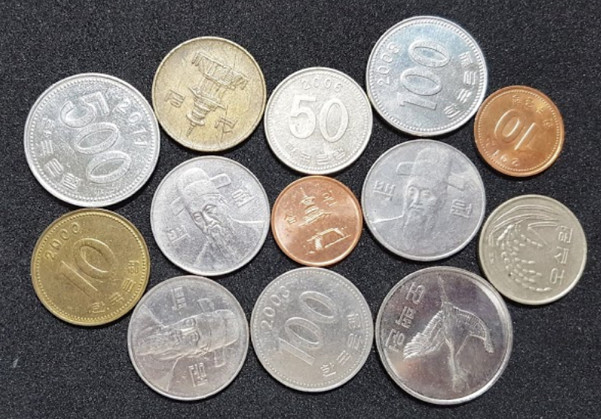

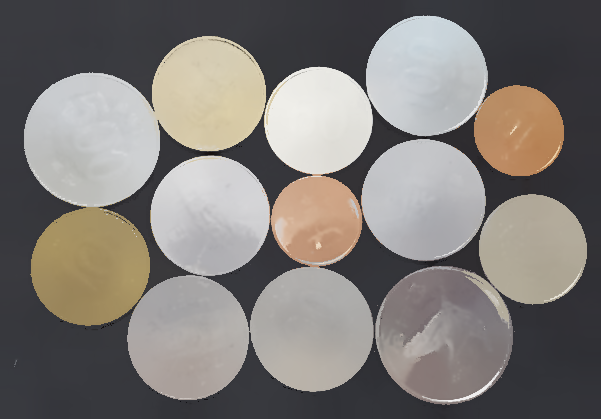

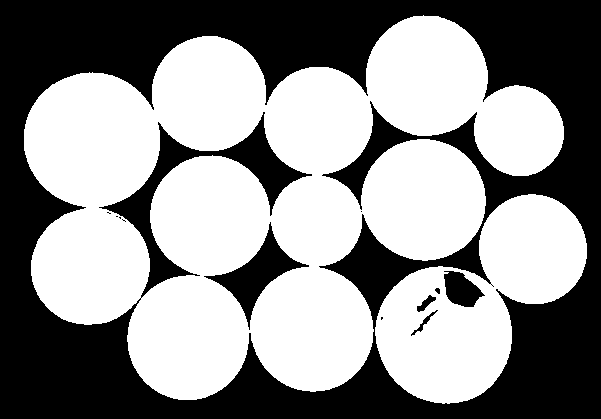

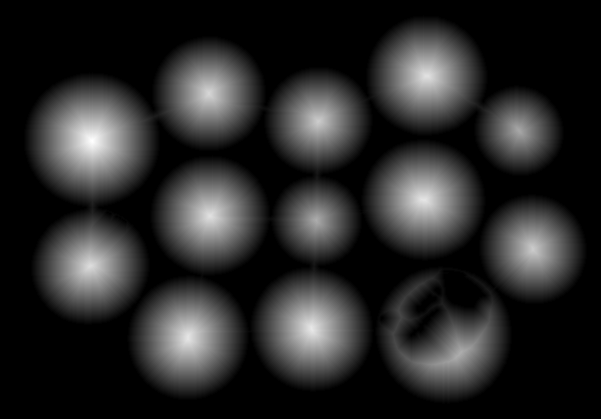

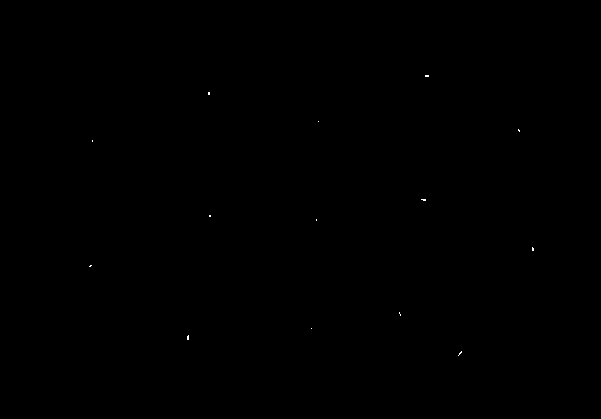

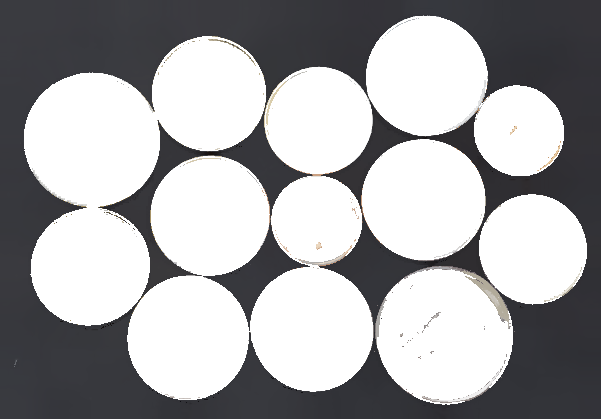

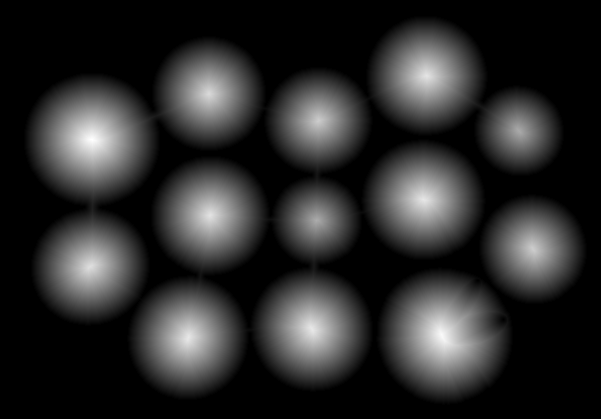

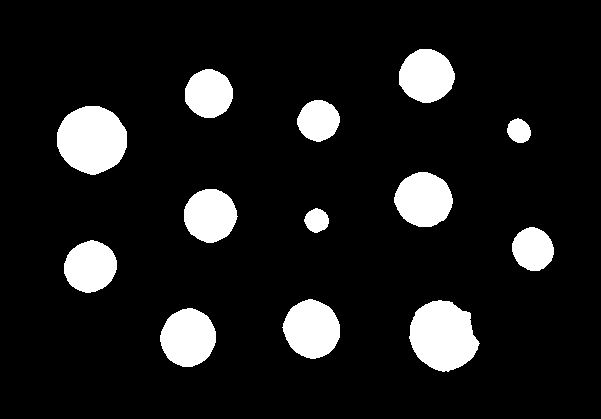

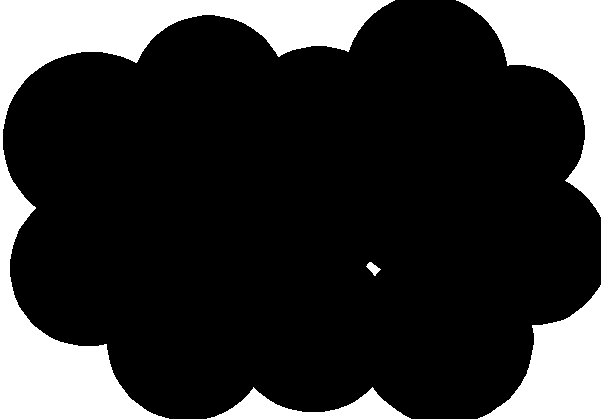

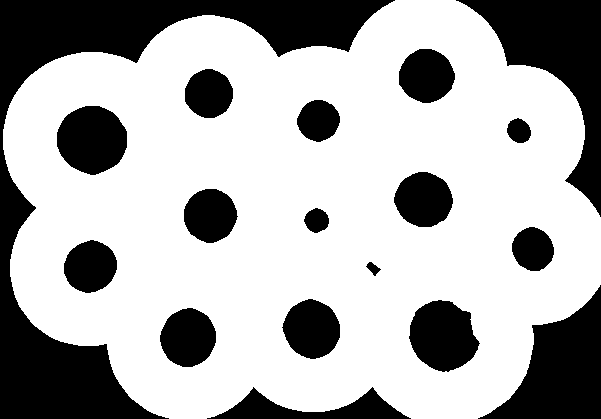

워터쉐드 전: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


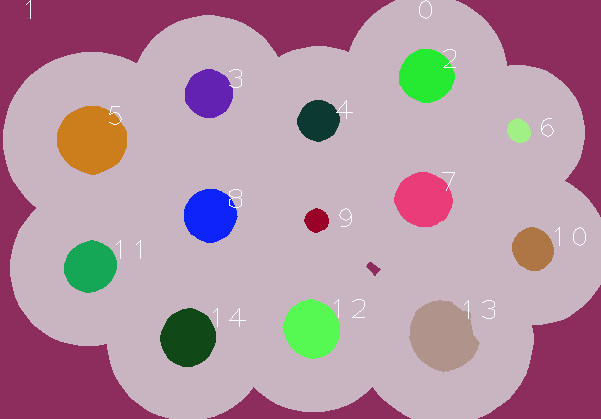

워터쉐드 후: [-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


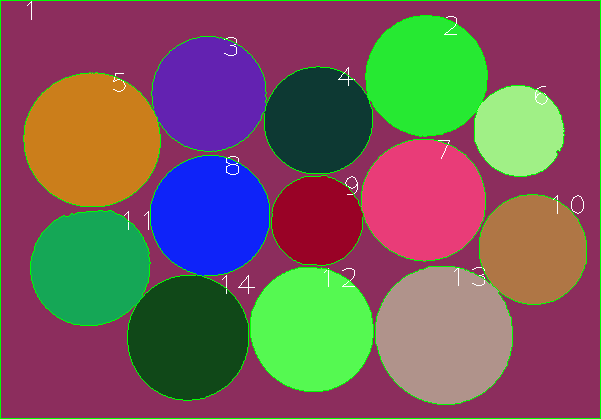

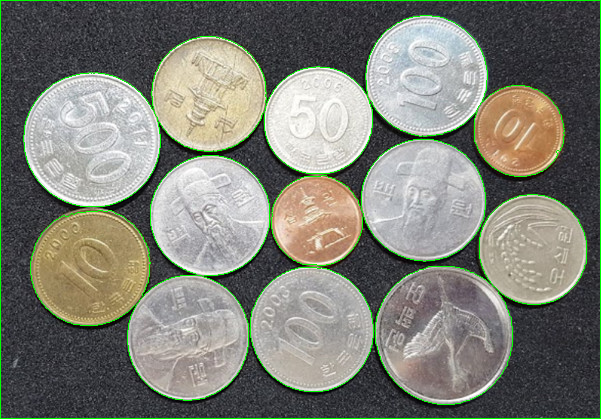

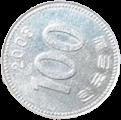

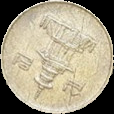

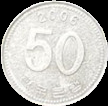

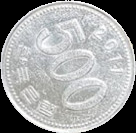

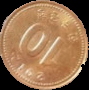

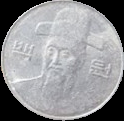

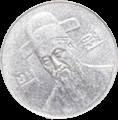

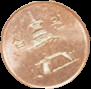

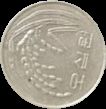

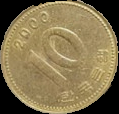

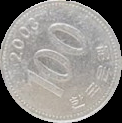

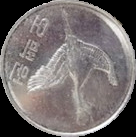

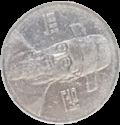

In [ ]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('../img/coins_connected.jpg')
rows, cols = img.shape[:2]
#cv2.imshow('original', img)
cv2_imshow(img)


# 동전 표면을 흐릿하게 피라미드평균시프트 적용
mean = cv2.pyrMeanShiftFiltering(img, 20, 50)
#cv2.imshow('mean', mean)
cv2_imshow(mean)
# 바이너리 이미지 변환
gray = cv2.cvtColor(mean, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3,3), 0)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imshow('thresh', thresh)
cv2_imshow(thresh)
# 거리 변환
dst = cv2.distanceTransform(thresh, cv2.DIST_L2, 3)
# 거리 값을 0 ~255로 변환
dst = ( dst / (dst.max() - dst.min()) * 255 ).astype(np.uint8)
#cv2.imshow('dst', dst)
cv2_imshow(dst)

# 거리 변환결과에서 로칼 최대 값 구하기
## 팽창 적용(동전 크기 정도의 구조화 요소 필요),
localMx = cv2.dilate(dst, np.ones((50,50), np.uint8))
## 로칼 최대 값 저장 할 배열 생성
lm = np.zeros((rows, cols), np.uint8)
## 팽창 적용전 이미지와 같은 픽셀이 로컬 최대 값이므로 255로 설정
lm[(localMx==dst) & (dst != 0)] = 255
#cv2.imshow('localMx', lm)
cv2_imshow(lm)

# 로컬 최대값으로 색 채우기
## 로컬 최대 값이 있는 좌표 구하기
seeds = np.where(lm ==255)
seed = np.stack( (seeds[1], seeds[0]), axis=-1)
## 색 채우기를 위한 채우기 마스크 생성
fill_mask = np.zeros((rows+2, cols+2), np.uint8)
for x,y in seed:
    ## 로칼 최대값을 시드로해서 평균 시프트 영상에 색채우기
    ret = cv2.floodFill(mean, fill_mask, (x,y), (255,255,255), \
                                            (10,10,10), (10,10,10))
#cv2.imshow('floodFill', mean)
cv2_imshow(mean)

# 색 채우기 적용한 영상에 다시 거리 변환 적용
gray = cv2.cvtColor(mean, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
dst = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
dst = ( (dst / (dst.max() - dst.min())) * 255 ).astype(np.uint8)
#cv2.imshow('dst2', dst)
cv2_imshow(dst)

# 거리 변환 결과값의 절반 이상을 차지한 영역은 확실한 전경으로 설정
ret, sure_fg = cv2.threshold(dst, 0.5*dst.max(), 255,0)
#cv2.imshow('sure_fg', sure_fg)
cv2_imshow(sure_fg)

# 거리 변환 결과를 반전해서 확실한 배경 찾기
_, bg_th = cv2.threshold(dst, 0.3*dst.max(),  255, cv2.THRESH_BINARY_INV)
bg_dst = cv2.distanceTransform(bg_th, cv2.DIST_L2, 5)
bg_dst = ( (bg_dst / (bg_dst.max() - bg_dst.min())) * 255 ).astype(np.uint8)
ret, sure_bg = cv2.threshold(bg_dst, 0.3*bg_dst.max(), 255,cv2.THRESH_BINARY)
#cv2.imshow('sure_bg', sure_bg)
cv2_imshow(sure_bg)


# 불확실한 영역 설정 : 확실한 배경을 반전해서 확실한 전경을 빼기
ret, inv_sure_bg = cv2.threshold(sure_bg, 127, 255,cv2.THRESH_BINARY_INV)
unkown = cv2.subtract(inv_sure_bg, sure_fg)
#cv2.imshow('unkown', unkown)
cv2_imshow(unkown)

# 연결된 요소 레이블링
_, markers = cv2.connectedComponents(sure_fg)

# 레이블링을 1씩 증가 시키고 0번 레이블 알 수 없는 영역을 0번 레이블로 설정
markers = markers+1
markers[unkown ==255] = 0
print("워터쉐드 전:", np.unique(markers))
colors = []
marker_show = np.zeros_like(img)
for mid in np.unique(markers): # 선택한 마커 아이디 갯수 만큼 반복
    color = [int(j) for j in np.random.randint(0,255, 3)]
    colors.append((mid, color))
    marker_show[markers==mid] = color
    coords = np.where(markers==mid)
    x, y = coords[1][0], coords[0][0]
    cv2.putText(marker_show, str(mid), (x+20, y+20), cv2.FONT_HERSHEY_PLAIN, \
                                                             2, (255,255,255))
#cv2.imshow('before', marker_show)
cv2_imshow(marker_show)

# 레이블링이 완성된 마커로 워터 쉐드 적용
markers = cv2.watershed(img, markers)
print("워터쉐드 후:", np.unique(markers))

for mid, color in colors: # 선택한 마커 아이디 갯수 만큼 반복
    marker_show[markers==mid] = color
    coords = np.where(markers==mid)
    if coords[0].size <= 0 :
        continue
    x, y = coords[1][0], coords[0][0]
    cv2.putText(marker_show, str(mid), (x+20, y+20), cv2.FONT_HERSHEY_PLAIN, \
                                                             2, (255,255,255))
marker_show[markers==-1] = (0,255,0)
#cv2.imshow('watershed marker', marker_show)
cv2_imshow(marker_show)

img[markers==-1] = (0,255,0)
#cv2.imshow('watershed', img)
cv2_imshow(img)

# 동전 추출을 위한 마스킹 생성
mask = np.zeros((rows, cols), np.uint8)
# 배경 마스크 생성
mask[markers!=1] = 255
# 배경 지우기
nobg = cv2.bitwise_and(img, img, mask=mask)
# 동전만 있는 라벨 생성 (배경(1), 경계(-1) 없는)
coin_label = [l for l in np.unique(markers) if (l != 1 and l !=-1)]
# 동전 라벨 순회 하면서 동전 영역만 추출
for i, label in enumerate(coin_label):
    mask[:,:] = 0
    # 해당 동전 추출 마스크 생성
    mask[markers ==label] = 255
    # 동전 영역만 마스크로 추출
    coins = cv2.bitwise_and(img, img, mask=mask)
    # 동전 하나만 있는 곳에서 최외곽 컨투어 추출
    contour, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,\
                                         cv2.CHAIN_APPROX_NONE)[-2:]
    # 동전을 감싸는 사각형 좌표
    x,y,w,h = cv2.boundingRect(contour[0])
    # 동전 영역만 추출해서 출력
    coin = coins[y:y+h, x:x+w]
    #cv2.imshow('coin%d'%(i+1), coin)
    cv2_imshow(coin)
    cv2.imwrite('../img/coin_test/coin%d.jpg'%(i+1), coin)
cv2.waitKey()
cv2.destroyAllWindows()